<h1>Monte Carlo Simulation of Ising Model 2D </h1>
<br>
<br?
Single Step:



In [31]:
import numpy as np 
import matplotlib.pyplot as plt
import random



class Ising2D():
    
    def __init__(self , n):
        
        self.N = n
    
    def GenerateInitialState(self):

        state = np.zeros((self.N,self.N))

        for i in range(self.N):

            for j in range(self.N):

                s = random.randint(0,1)

                if s == 0:

                    state[i,j] = -1

                else:

                    state[i,j] = s

        self.state = state


    def move(self , beta):


        for i in range(self.N):

            for j in range(self.N):

                a = random.randint(0,self.N-1)
                b = random.randint(0,self.N-1)

                s = self.state[a,b]

                H = 2*s*(self.state[(a+1)%self.N , b] + self.state[a,(b+1)%self.N] + self.state[(a-1)%self.N , b] + self.state[a , (b-1)%self.N])

                if H < 0:

                    s = -1*s

                    self.state[a,b] = s

                else:

                    p = np.exp(-H*beta)

                    if np.random.rand() < p:

                        s = -1*s

                        self.state[a,b] = s
                        
    def CalculateEnergy(self):
        
        energy = 0
        
        for i in range(self.N):
            
            for j in range(self.N):
                
                H = 2*s*(self.state[(i+1)%self.N , j] + self.state[i,(j+1)%self.N] + self.state[(i-1)%self.N , j] + self.state[i , (j-1)%self.N])
                
                energy+= -1*self.state[i,j]*H
                
        return energy
    
    def CaclulateMagnetism(self):
        
        mag = np.sum(self.state)
        
        return mag
    

    def Simulate(self , steps):

        #N = 10 #lattice dimension
        T = 0.4 #temperature in kelvin
        self.GenerateInitialState()

        PlotState(self.state , self.N)

        for _ in range(steps): #1500 steps

            move(self.state,self.N,1/T)

            if _%100== 0:

                PlotState(self.state , self.N)
    
    def SimulateOverT(self , t_max):
        
        t_array = np.arange(0.1,t_max,0.1)
        
        for t in t_array:
            
            beta = 1/t
            
            
            
    
    @staticmethod
    def PlotState(state,N):

        plt.style.use('ggplot')

        plt.title("state")

        plt.xlabel("i")

        plt.ylabel("j")

        for i in range(N):

            for j in range(N):

                if state[i,j] < 0:

                    plt.scatter(i,j,color = 'r')

                else:

                    plt.scatter(i,j,color = 'g')

        plt.show()



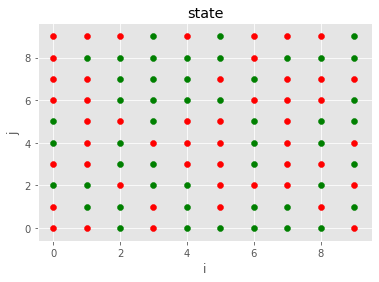

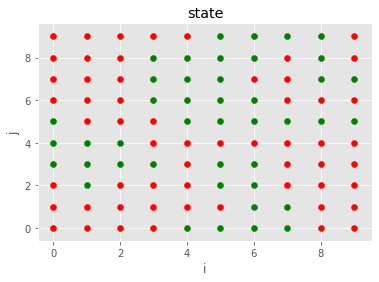

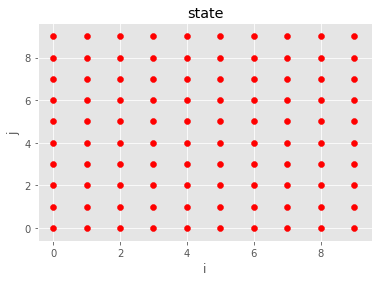

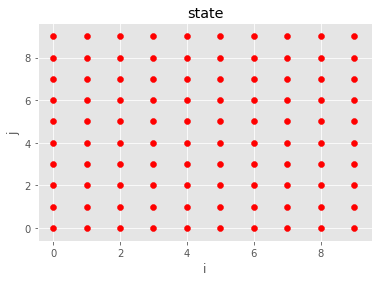

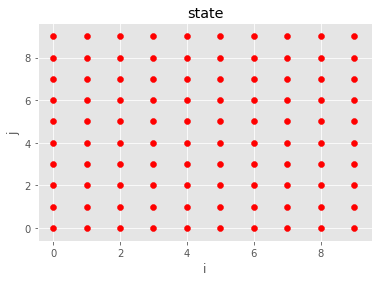

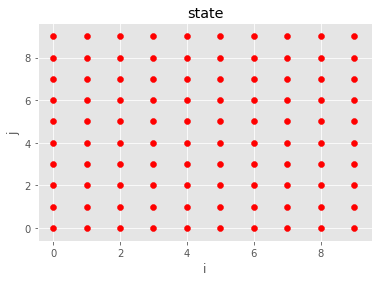

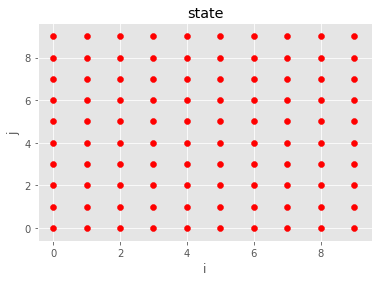

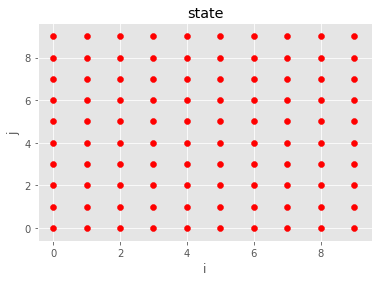

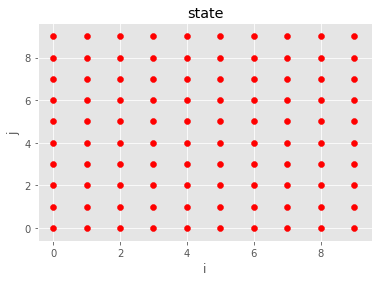

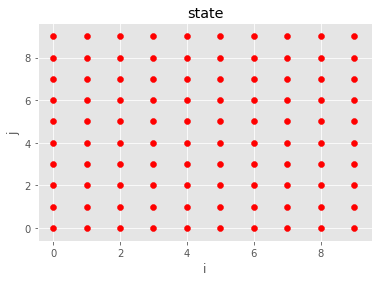

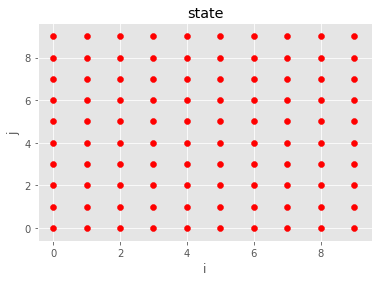

In [33]:

model = Ising2D(10)

model.Simulate(1000)